# RUN THE BOTTOM CHUNK OF CODE AS SOON AS YOU OPEN THIS 

Scroll to the bottom and run the two large cells that say HEY RUN THIS and HEY RUN THIS 2!!!

Sorry this is painful it has to do with the fact that juypter notebooks can't call things like plotting in line (matplotlib) or generating windows(cv2) from a .py  they need to be defined in the notebook as as far as I know. 


## common troubleshooting solutions:

1. make sure your file paths use these slashes / and end with a / 
2. make sure you run the two blocks of code at the bottom
3. are you in the righ file paths?
4. is your info file the same name as your tif file?

### NOTE: This is a 'cleaned' copy of the OMM_Analysis from the lab's github I made from running data from ONI using TIFF files. If you have something  else, this is not for you.   
  
    

ffptif started at 2022-04-26 16:12:13 on file: D:/Ryan/Data/Exp9/Proflavine_BaseD2ORBIT_Exp9_IB_10hz_20laser_5uM_on_posXY0_channels_t0_posZ0
x pixels: 428. y pixels: 684 r 64
xcrop: 384. ycrop: 640 for bk size 64
number sets: 1
working on 0
frame: 0 at 2022-04-26 16:12:15 -- no_good = 41. no_keep = 317
based on intensity, keeping 30 out of 41 spots
there were 30 events
average event length: 100.000000
median event length: 100.000000
done at 2022-04-26 16:12:15
automatically calling aptif
apdax started at 2022-04-26 16:12:15 on file: D:/Ryan/Data/Exp9/Proflavine_BaseD2ORBIT_Exp9_IB_10hz_20laser_5uM_on_posXY0_channels_t0_posZ0
ignoring bounds from peak picking...
30  events were found in file (after filtering, if applicable)
working on : 0 999at 2022-04-26 16:12:15
saving complete .trdir at 2022-04-26 16:12:49
number of peaks: 30
Generating 2D histograms starting at 2022-04-26 16:12:49on D:/Ryan/Data/Exp9/Proflavine_BaseD2ORBIT_Exp9_IB_10hz_20laser_5uM_on_posXY0_channels_t0_posZ0trdir
wo

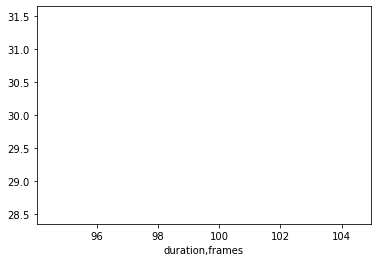

In [1]:
import sys

sys.path.append('D:/Ryan/OMMxDORA/sma/') #if you are not amanda, change to your sma file path (found in zipfile downloaded from github)

from ffpdax import ffp_dax
from ffptif import ffp_tif
import DORA

analysisPath='D:/Ryan/Data/Exp9/'

xmlName='ORBIT_Analysis_Settings'

analysisName='Proflavine_BaseD2ORBIT_Exp9_IB_10hz_20laser_5uM_on_posXY0_channels_t0_posZ0'
exp_title = "Exp 9 - 5uM on - Peak "
xmlFilename=analysisPath+xmlName
filename=analysisPath+analysisName
ffp_tif(filename,xmlFilename)

In [2]:
import os
newpath = filename+'trcsv'
if not os.path.exists(newpath):
    os.makedirs(newpath)    #makes a new folder in with same name as filename but ending in trcsv
    
from tr2csv import tr_2csv
tr_2csv(filename)           #Generates CSV file from .tr files      

## 2D histogram stuff



In [3]:
import numpy as np

histInfoName=filename+'trdir/histpar' # opens the infromation file
histInfoFile = open(histInfoName+'.info','rb')
histInfo=np.fromfile(histInfoFile,dtype='int32')
histInfoFile.close()
print("Number of peaks")
print(histInfo[3])
histInfo[3]

Number of peaks
30


30

In [7]:
#display settings for tracjectories
histPerCol=5
histPerRow=6

print("Displaying")
print(histPerRow*histPerCol)

Displaying
30


In [8]:
#when you run this, you should get a pop up window. check your windows bar at the bottom of the deskstop  
import numpy as np
from PIL import Image
import argparse
import cv2


[refptnp,refsc,refcol,sum_of_rows, out]=disp_hist(filename,histPerCol,histPerRow) #change for dax
print('pk, t1 ,t2')
print(out)


[   0    0 1000]
[   1    0 1000]
[   2    0 1000]
[   3    0 1000]
[   4    0 1000]
pk, t1 ,t2
[[   0    0 1000]
 [   1    0 1000]
 [   2    0 1000]
 [   3    0 1000]
 [   4    0 1000]]


In [9]:
#Remeber python indexs from 0 so if you want your first selection to be the peak you analyze pick 0
#also the peaks go in paired sets, the first two selections will be "peak 0"

chosenpk=8

#pk=str(out[chosenpk*2,0]).zfill(5)
#frStart=out[chosenpk*2,1]
#frEnd=out[((chosenpk*2)+1),2] 
#print("Peak: "+pk)
#print("Start: "+str(frStart))
#print("End: "+str(frEnd))

pk=str(16).zfill(5)
csvpath=filename+'trcsv/'
csvnum=csvpath+pk+'.csv'
print(csvnum)

D:/Ryan/Data/Exp9/Proflavine_BaseD2ORBIT_Exp9_IB_10hz_20laser_5uM_on_posXY0_channels_t0_posZ0trcsv/00016.csv


#DORA Graphing

In [20]:
#universal parameters
exp_tag = exp_title + pk # a tag that caries the name of the experiment
file_name = csvnum  
pixel_size = 117  # in nanometers
time_step = 100  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = 100  # enter -1 to end at the last value of the data set
cmap = "spring_r" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y

#downsampling parameters
bin_size = 20  # bin size for downsample/filter processing
processing = "none"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
plot_type = "find_sus_angle"
#plot_type = "2D"
#Graphing options:
    #Trajectory Maps:
        #2D: Colorful 2D visulization of the rotor from above
        #3D: 2D plot but time is an axis
    
    # Grid plot
        #grid: a grid of little snippets of the data
        
    #Angular Analysis
        #By Jerry
                #radius_filter: Demarcate the sus data points that will be eliminated from calculations
                #find_sus_angle: Indicate sus angles within angular_continuous by Jerry
                #angular_continuous_filtered: Angular Continuous recalculated with sus points filtered. Sus skips indicated.
                #basal3: Graphs tailored for the basal graph analysis 3/14/2022
                    #Angular Continuous with a downsampled curve as well. still has bugs with error labelling



    ############################### these have not been converted yet:
        #By Claire:
                #angular: angle vs time, but it's not cummulative and resets at 360 to 0 (Claire)
                #angular_continuous: Claire's Calculation of a cummulative angle
                #find_sus_angle_CR: Indicate sus angles within angular_continuous by Claire's calculations

    #Animation
        #interactive: Interactive graph
        #animated: animated trajectory in notebook
        #HTML: Animated trajectory in a new window. May run better

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find sus angle
display_center = "no"

#Labels
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'no'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter

#       Formatting parameters for 'angular_continuous_filtered' plot
# enter 'line' or 'scatter' for a line graph or a scatter plot. Line plot makes up points when hovered
graph_style = 'line'


#Formatting parameters 'grid' plot
frames_per_plot = 195  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= analysisName
name_saving_folder = "Data Tables"

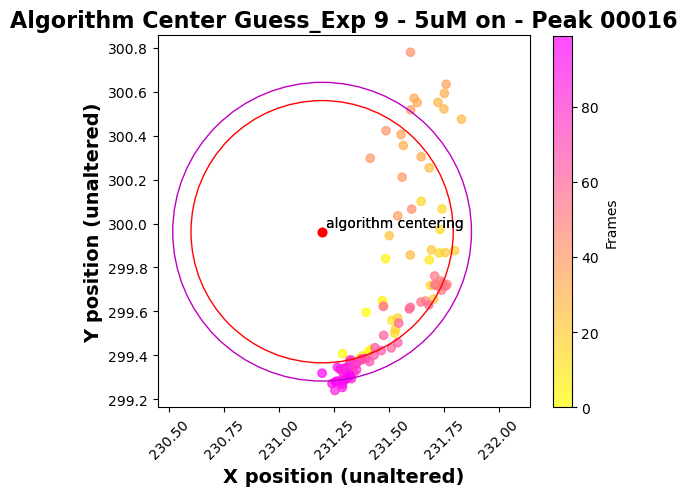

The center is (231.19511413574216, 299.96267762476083)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


In [21]:
initial_parameters = [file_name,time_step, frame_start, frame_end, cmap, exp_tag,first_zero_end]
center, data, ind_invalid_reading, data_back = DORA.find_center(*initial_parameters)

In [22]:
downsample_parameters = [bin_size, processing, data, center, time_step, pixel_size, frame_start, frame_end]
down_sampled_df = DORA.downsample(*downsample_parameters)

end


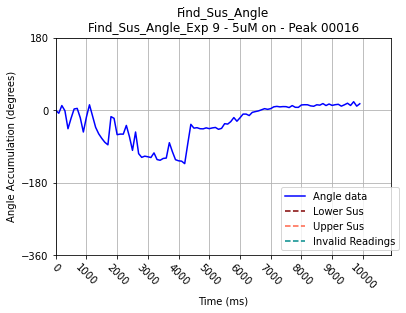

In [23]:
#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag]

#Angle Versus Time (AVT or avt) parameters:
avt_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap,exp_tag] 

#DORA.graph(plot_type,*avt_parameters)

if plot_type == "2D" or plot_type == "3D":
    DORA.graph(plot_type,*tajectory_map_parameters)
else:
    DORA.graph(plot_type,*avt_parameters)

# HEY! RUN THIS: 

In [5]:
def disp_hist(file,perCol,perRow):

    
    #Get file paths
    sets=file+'trdir/histsets'
    filename=file+'trdir/hist2d'
    infor=file+'trdir/histpar'
    
    #open files
    fileptr = open(filename+'.stack','rb')
    fileptrSets = open(sets+'.list','rb')
    fileptrInfo = open(infor+'.info','rb')
    

    #Get Infor from files 
    frame = np.fromfile(fileptr,dtype='int32')
    histlist=np.fromfile(fileptrSets,dtype='int32')
    histinfo=np.fromfile(fileptrInfo,dtype='int32')
    histsearch=np.reshape(histlist,[len(histlist)//3,3])
    #print(frame.shape)
    #print(histlist.shape)
    #print(histinfo.shape)

    histnum=histinfo[3]  #number of histograms
    histrow=int(histnum//perCol) #number of histograms / number of histograms per col to give number per row 
    
    res=histinfo[0]   #get the 'res' as defined in 2D hist this is the size of the histogram 30x30


    
    
    #Openining the Histogram and making an Image. 
    fileptr.seek(0) #Get the first frame 

    result = Image.new('F', (histrow*res,perCol*res)) #make a new image of correct size 
    for j in range (0,histrow):    
        for i in range (0,perCol):
        #print((i+(j*histpercol)))
            fileptr.seek((i+(j*perCol))*res*res*4)  #open frame poisiton x resolution *32/8 (8 bit vs 32 bit)
            frame2 = np.fromfile(fileptr,dtype='int32',count=res*res)
            frame2 = np.reshape(frame2,[res,res])
            frame2 = np.transpose(frame2)
            frame2 = np.rot90(np.rot90(np.rot90(frame2)))
            frame2=frame2
            im2 =Image.fromarray(frame2)
        #print(i)
            result.paste(im2, box=((j*res),(i*res))) #load each histogram into the total histogram image. 
       
    
   

    img = np.array(result) 

    #result.show(result)
    avgnonzero = img[np.nonzero(img)].mean() #this might be bad practice 
    img=np.array((img/avgnonzero)*255).astype('uint8')#but here i am sclaing my image based on avg non zero to gray scale 
                                                        # This is only for display and it works fairly well but may be something that we want to return to. 



    

    grayImage = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  #Converts image to gray scale
    heatmap = cv2.applyColorMap(grayImage, cv2.COLORMAP_MAGMA)  #converst grey scale to color map magma 
    
    refPt = []
    
    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            #print(x+(k*histperrow*30),",",y)
            imgpkdisp=[((x+(k*perRow*30))//30*perCol),y//30] #Converting X and y of click to position on histogram as a grid. K s frame number. Scale by 30 because of size of histogram. 
            imgpkdisp=sum(imgpkdisp)  # This is the exact histogram number. based off frame, and which position
            imgpkdisp=histsearch[imgpkdisp] # now we use that info to find the hisgram in the  info file 
            imgpkdisp=str(imgpkdisp)
            print(imgpkdisp)
            refPt.append([x+(k*perRow*30),y]) #This stores the histograms selected. 
            font = cv2.FONT_HERSHEY_SIMPLEX
            strXY = str(x+(k*perRow*30) )+", "+str(y)
            cv2.putText(imgcrop, imgpkdisp, (x,y), font, 0.5, (255,0,0), 2) #Draw coordinates on image. 
            cv2.imshow('2D Histogram [PK# t1 t2]',imgcrop)
    
    savePt=[]
    testvar=0
    t=img.size//((perCol*30)*perRow*30)
    
    k=0
    
    #Load in frames for searching
    while k < t:
        imgcrop=heatmap[0:(perCol*30),k*perRow*30:(k+1)*30*perRow]  #Display each frame as a heat map. 
        cv2.imshow('2D Histogram [PK# t1 t2]',imgcrop )
        cv2.namedWindow('2D Histogram [PK# t1 t2]')
        cv2.setMouseCallback('2D Histogram [PK# t1 t2]', click_event)
        key=cv2.waitKey(0)
        if key == 27: #if escape key break the loop
            break
        elif key==98:  # if b go backwards
            if k == 0:
                k=k
            else:
                k=k-1  # any other key go forward
        else:
            k=k+1
        
   # for k in range (0,t):
       # print(k)
       # imgcrop=heatmap[0:(perCol*30),k*perRow*30:(k+1)*30*perRow]
       # cv2.imshow('heatmap',imgcrop )
       # cv2.namedWindow('heatmap')
       # cv2.setMouseCallback("heatmap", click_event)
       # key=cv2.waitKey(0)
        #if key == 27:
        #    break
        #elif key == 98:
            #print(k)
        
        
            
    cv2.destroyAllWindows()
    refptnp=np.array(refPt)  #stored histogram positions
    #print(refptnp)
    refsc=refptnp//30     # scale to histogram number per frame
    refcol=refsc*[perCol,1]  # Scale to be histogram number on right frame 
    sum_of_rows = np.sum(refcol, axis = 1)  #sum to get historgram number
    out=histsearch[sum_of_rows] #search  histogram info to get pk# and T1 T2. 
    return refptnp , refsc , refcol ,sum_of_rows , out   #Return Relevant vars. 